# Modifying Ligands in Python

Learning Goals

* To learn about chemical manipulation in python using rdkit
* To imagine new structures based on existing structures

Learning Objectives

* To understand the utility of the different Python libraries utilized in this notebook
* To explain the features of SMILES strings and how they are used to communicate chemical structures to computers
* To modify a ligand file in a meaningful way (*e.g.*, testing stereochemistry or electrochemistry) and to save the modified file for future use
* To add meanin

In this notebook, we are going to take one of the ligands that we downloaded in the [EC_class_ligands_search](EC_class_ligands_search.ipynb) notebook. 

After completing this notebook, if you wish to dig deeper on rdkit, consider reading [Getting Started with rdkit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html).

In [194]:
import rdkit                 # an open source github repository of cheminformatics software
from rdkit import Chem       # a subset of rdkit that supports file string to structure conversions
from rdkit.Chem import AllChem
from rdkit.Chem import Draw  # a subset of rdkit that supports chemical drawing in Python

### Digital Representation of Molecules

With training we can learn to recognize and interpret chemical structures based on line drawings and other standard representations. One effective way to work with chemical structures in computer languages is to convert them into unique strings of characters which precisely represent the molecule of interest. 

If you visit the [PubChem page for Caffeine](https://pubchem.ncbi.nlm.nih.gov/#query=caffeine), you will see a number of different string representations for caffeine:

* IUPAC Name: 1,3,7-trimethylpurine-2,6-dione  
* Isomeric SMILES: CN1C=NC2=C1C(=O)N(C(=O)N2C)C  
* InChIKey: RYYVLZVUVIJVGH-UHFFFAOYSA-N  
* InChI: InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3

You may have learned IUPAC naming during organic chemistry. It is very effective and unique, but programming languages need strings that are rigorously unambiguous, so we will use one of the other options: SMILES, which stands for "Simplified Molecular-Input Line-Entry System".

You can read more about SMILES at this [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html). We will use SMILES in a very limited way in this workshop and you can learn more about using SMILES if you visit the [MolSSI Education Jupyter notebook 01_molecule_representation](https://github.com/MolSSI-Education/molssicheminfo/blob/master/01_molecule_representation.ipynb).

If we look at the small molecule, [13U](https://www.rcsb.org/ligand/13U), on the [RCSB PDB website](https://www.rcsb.org), you will see that page also contains a list of strings for the molecule:

* Isomeric SMILES: H]/N=C(/c1ccc(cc1)CNC(=O)[C@@H]2CCCN2C(=O)CNC3CCCCCCC3)\N
* InChI: 	InChI=1S/C23H35N5O2/c24-22(25)18-12-10-17(11-13-18)15-27-23(30)20-9-6-14-28(20)21(29)16-26-19-7-4-2-1-3-5-8-19/h10-13,19-20,26H,1-9,14-16H2,(H3,24,25)(H,27,30)/t20-/m0/s1
* InChIKey: MMLOIDMSBRJZAE-FQEVSTJZSA-N

For this notebook, we will use the SMILES representation of the ligand structure we are going to explore together. It will be one of the ligand structures we downloaded in the first notebook, so it should already be in your ligands folder.

### Things to Do for this Notebook

1. Get the SMILES string for one of the trypsin ligands. Make sure it is correct. Done [13U](https://www.rcsb.org/ligand/13U). I had to use the SMILES string from PubChem.
2. Go from structure to SMILES string to structure with rdkit. Done
3. Find out how to modify the ligand: N for C substitution in an aromatic ring, adding CH3, adding a t-butyl group. Done
4. Optimize the files in 3D.
5. Save the files in the ligands folder with systematic naming conventions.

### Modifying the ligand molecule

The `rdkit` library has some very powerful tools for pattern recognition and substructure substitutions that would enable us to complete the following tasks in a very powerful and extensible fashion. However in view of the time constraints of this workshop, we will take a much simpler approach. If you would like to explore the more powerful approach, you can learn much more the [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html). 

* Obtain the SMILES code for our ligand of choice
* Visually inspect the SMILES code to identify the aromatic carbon position we wish to modify
* Perform three modifications of the ligand
1. Replace an aromatic ring carbon with a nitrogen.
1. Starting from the original ligand, add a methyl group to the carbon.
1. Starting from the original ligand, add a t-butyl group to the carbon.

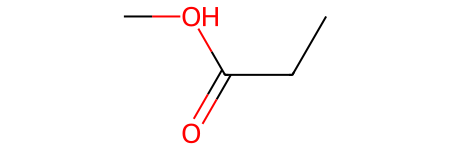

In [195]:
repl = Chem.MolFromSmiles('OC')

patt = Chem.MolFromSmarts('[$(NC(=O))]')

m = Chem.MolFromSmiles('CC(=O)N')

rms = AllChem.ReplaceSubstructs(m,patt,repl)

rms

Chem.MolToSmiles(rms[0])
'COC(C)=O'

original_molecule = Chem.MolFromSmiles('CCC(=O)N')
original_molecule

new_molecule = AllChem.ReplaceSubstructs(original_molecule,patt,repl)
new_molecule[0]

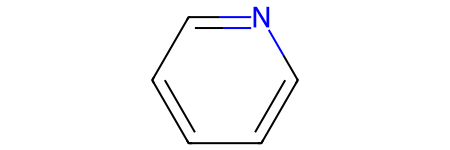

In [196]:
benzene = Chem.MolFromSmiles('c1ccccc1')
benzene

pattern = Chem.MolFromSmarts('c')
repl = Chem.MolFromSmarts('N')

pyridine = AllChem.ReplaceSubstructs(benzene,pattern,repl)
pyridine[0]

### Modifying a ligand that is known to bind to trypsin

We will start with the ligand [PDB entry 13U](https://www.rcsb.org/ligand/13U). Note: the SMILES string from that page does not work with the ligand N-cyclooctylglycyl-N-(4-carbamimidoylbenzyl)-L-prolinamide (PDB entry 13U)

We can use this SMILES string for the same molecule provided by PubChem:
[N-cyclooctylglycyl-N-(4-carbamimidoylbenzyl)-L-prolinamide](https://pubchem.ncbi.nlm.nih.gov/#query=N-cyclooctylglycyl-N-(4-carbamimidoylbenzyl)-L-prolinamide).

In this part of the notebook, we will learn to make specific changes in the SMILES string to generate the desired 2D structures. Once that is complete, we will need to generate the molecule in 3D and save it in the mol2 file format.

Process:
1. Convert the SMILES string into a structure and inspect it visually. To do this we will use the `Chem.MolFromSmiles` function.
1. Identify the carbon atom near the guanidino group we want to modify. The bold portion highlighted in the SMILES string for the ligand is the third ring in the structure and it is the only one that contains double bonds, so we will focus there: C1CCCC(CCC1)NCC(=O)N2CCC[C@H]2C(=O)NC**C3=CC=C(C=C3)** C(=N)N.The modification target is the 2nd C in the CC=C portion of the string.
1. Substitute the target aromatic ring carbon, C, with a nitrogen, N, and save the molecule. This will happen in the second cell below.
1. Return to the original structure and attach a methyl group to the same carbon by placing a (C) after the target carbon. This will happen in the third cell below.
1. Return to the original structure and attach a t-butyl group to the same carbon by placing (CC(C)(C)(C)) after the target carbon.


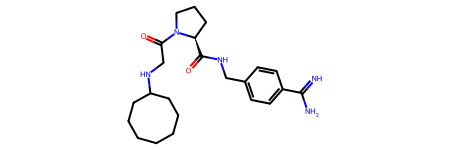

In [197]:
# Convert a SMILES string into a structure and inspect it visually - the original 13U structure

ligand = Chem.MolFromSmiles('C1CCCC(CCC1)NCC(=O)N2CCC[C@H]2C(=O)NCC3=CC=C(C=C3)C(=N)N')
ligand

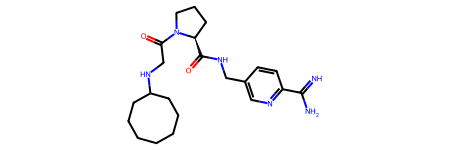

In [198]:
# Replace the carbon atom in the aromatic ring nearest to the guanidino group with a nitrogen atom.

ligand_cn = Chem.MolFromSmiles('C1CCCC(CCC1)NCC(=O)N2CCC[C@H]2C(=O)NCC3=CN=C(C=C3)C(=N)N')
ligand_cn

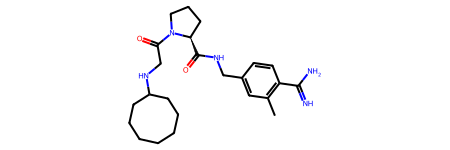

In [199]:
# Starting from the original 13U structure (without the nitrogen substitution), 
# add a methyl group as (C) right after the target carbon in the SMILES string.

ligand_c_methyl = Chem.MolFromSmiles('C1CCCC(CCC1)NCC(=O)N2CCC[C@H]2C(=O)NCC3=CC(C)=C(C=C3)C(=N)N')
ligand_c_methyl

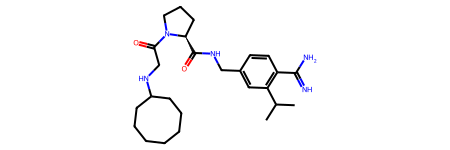

In [200]:
# Starting from the original 13U structure (without the nitrogen substitution), 
# add an isopropyl group as (C(C)(C)) right after the target carbon in the SMILES string. 

ligand_c_ipr = Chem.MolFromSmiles('C1CCCC(CCC1)NCC(=O)N2CCC[C@H]2C(=O)NCC3=CC(C(C)(C))=C(C=C3)C(=N)N')
ligand_c_ipr

### Converting the 2D ligand structures to 3D structures for use in docking

At this point, we have four structures: ligand (actually the original 13U structure from the RCSB PDB), ligand_cn (13U with one aromatic carbon substituted with a nitrogen), ligand_c_methyl (13U with a methyl group attached to the target carbon) and ligand_c_tbu (13U with a t-butyl group attached to the target carbon). At this point, these are 2D molecules. We could download them now and rdkit would give them some coordinates, but it is best to control this process. We will follow these steps:

1. Add hydrogen atoms on the molecules using the AllChem.AddHs() function.
2. Optimize the ligands with explicit hydrogens in 3D.
3. Download the 3D-optimized molecules.

In [201]:
# We will use at print command to look at the contents of the data for the ligand. Note that it is only 2D (xy) data.
# The third column contains only zeros.

AllChem.Compute2DCoords(ligand)
print(Chem.MolToMolBlock(ligand))


     RDKit          2D

 30 32  0  0  0  0  0  0  0  0999 V2000
   -3.7613   -5.1040    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2051   -4.6975    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9387   -3.3891    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.5322   -1.9452    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2238   -1.2117    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7799   -1.6181    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0464   -2.9265    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4529   -4.3704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4008    0.2779    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1993    1.1759    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3764    2.6654    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7548    3.2569    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1749    3.5635    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1952    5.0633    0

In [202]:
# We can use the print command to save the 2D representation of ligand 13U.

print(Chem.MolToMolBlock(ligand), file = open('ligand_13U-2D.sdf', 'w+'))

In [203]:
# We will now use an rdkit command to create the 3D representation of ligand 13U

# First we add the hydrogens

ligand13U_H = Chem.AddHs(ligand)

# Execute this print command and look in fourth column for the atom type. 
# You will notice hydrogens (H) that you did not see before.

print(Chem.MolToMolBlock(ligand13U_H))


     RDKit          2D

 65 67  0  0  0  0  0  0  0  0999 V2000
   -3.7613   -5.1040    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2051   -4.6975    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9387   -3.3891    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.5322   -1.9452    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2238   -1.2117    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7799   -1.6181    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0464   -2.9265    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4529   -4.3704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4008    0.2779    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1993    1.1759    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3764    2.6654    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7548    3.2569    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1749    3.5635    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1952    5.0633    0

In [204]:
# Create the 3D version of the molecule. I am following a YouTube video to do this:
# https://www.youtube.com/watch?v=NozaWUkJ3YM

AllChem.EmbedMolecule(ligand13U_H)   # 

# Print out the data for ligand13U_H. Notice the values in the third (z) column - this is a 3D molecule.

print(Chem.MolToMolBlock(ligand13U_H))


     RDKit          3D

 65 67  0  0  0  0  0  0  0  0999 V2000
   -6.8604   -0.0033   -1.0473 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.1956    1.2934   -1.3190 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1441    1.7397   -0.3733 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7749    0.8355    0.7344 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5710   -0.0897    0.3771 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1239   -1.3374   -0.1991 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6713   -1.1303   -1.5777 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.1621   -1.2155   -1.5483 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6282    0.6261   -0.3775 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9232    1.6876    0.1908 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7914    1.3804    1.0861 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2462    2.3938    1.7053 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2335    0.1319    1.3374 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5717   -1.1493    0

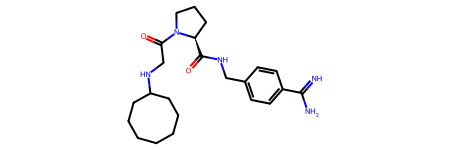

In [205]:
# Display the 2D structure

ligand

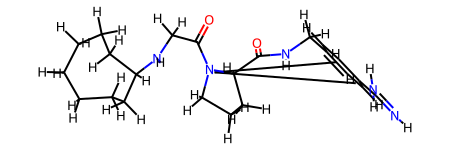

In [206]:
# Display the molecule. Note that the shape of the molecule has changed.

ligand13U_H

In [207]:
# Finally we will optimize the 3D structure before saving it.

opt_13U_H = AllChem.MMFFOptimizeMoleculeConfs(ligand13U_H)

# Now look at the coordinates again and notice that they have changed.

print(Chem.MolToMolBlock(ligand13U_H))


     RDKit          3D

 65 67  0  0  0  0  0  0  0  0999 V2000
   -7.3888   -0.0024   -0.1676 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7012    1.2409   -0.7228 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8346    1.9889    0.2877 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9419    1.1737    1.2290 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9450    0.1597    0.6365 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5436   -1.2442    0.3756 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3582   -1.4676   -0.8996 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.8724   -1.3126   -0.7561 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1921    0.6352   -0.5335 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2239    1.7051   -0.2231 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0732    1.2238    0.6686 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9632    1.6285    1.8291 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1685    0.3403    0.1237 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2715   -0.3398   -1

In [208]:
# When the MMFFOptimizeMoleculeConfs function it applied to a file, it optimizes the 3D structure,
# and actually changes the coordinates for the molecule. It also gives an output that we have 
# stored at opt_13U_H, which is a list (with only one element this time) of tuples. The first number in
# the tuple indicates if the conformer converged with a value of 0. The second value is the free energy.

opt_13U_H

[(1, 41.04667511953394)]

In [209]:
# Finally we will write and store the 3D coordinate file.

print(Chem.MolToMolBlock(ligand13U_H), file = open('ligand_13U-3D.sdf', 'w+'))

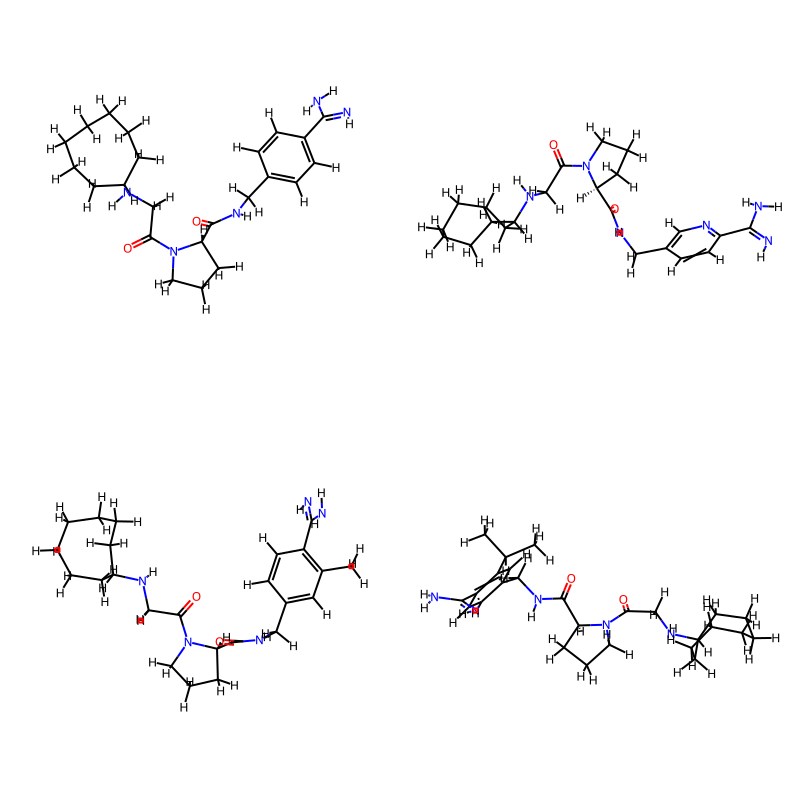

In [210]:
# We will use a for loop to add hydrogens to and optimize each ligand in 3D 

ligands = [ligand, ligand_cn, ligand_c_methyl, ligand_c_tbu]  # A list so we can use a for loop 
ligands_H = []                                                # An empty list to hold the ligands with explicit hydrogens
lig_converge = []

for mol in ligands:                                           # A for loop to iterate the list of ligands
    mol_H = AllChem.AddHs(mol)                                # The function that adds the hydrogens
    AllChem.EmbedMolecule(mol_H)                              # Convert from 2D to 3D
    opt = AllChem.MMFFOptimizeMoleculeConfs(mol_H)            # Optimization function
    lig_converge.append(opt)                                  # Collecting data on optimization
    ligands_H.append(mol_H)                                   # Appending the hydrogenated ligands to the list ligands_H
    
Draw.MolsToGridImage(ligands_H,molsPerRow=2, subImgSize=(400,400))                # Drawing the molecules for inspection

In [211]:
# Save the ligand files in 3D format with names that easily identify the molecules


print(Chem.MolToMolBlock(ligands_H[0]), file = open('data/ligand13U-3D.sdf', 'w+'))

print(Chem.MolToMolBlock(ligands_H[1]), file = open('data/ligand13Un-3D.sdf', 'w+'))

print(Chem.MolToMolBlock(ligands_H[2]), file = open('data/ligand13Ume-3D.sdf', 'w+'))

print(Chem.MolToMolBlock(ligands_H[3]), file = open('data/ligand13Uipr-3D.sdf', 'w+'))


In [212]:
# Did the optimizations converge properly?

for data in lig_converge:
    print(data)

[(1, 39.46486582574428)]
[(1, 67.29065572877772)]
[(1, 50.409083454052976)]
[(1, 62.68329061438793)]


### Questions

It appears that all of the code worked, but I am concerned that the attempts to optimize the ligands resulted in (a) non-convergence - not sure what that means - and (b) free energies values that are highly positive numbers.

The code below is from a YouTube video, [RDKit Unleashed - Part1: A Visual Journey into the World of Cheminformatics! from Code to Discovery](https://youtu.be/NozaWUkJ3YM?feature=shared). The code below is taken from this video and run with some common ligands (glucose, ATP) to see if they converge and give negative free energies.

In [215]:
# Running their code on glucose

m = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O')
m.SetProp("_Name", "mol-2d")
AllChem.Compute2DCoords(m)

0

In [216]:
print(Chem.MolToMolBlock(m))

mol-2d
     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    2.8129   -0.0968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3169    0.0124    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4743   -1.2286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0217   -1.1194    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6751    0.2308    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8326    1.4718    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6635    1.3626    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4860    2.8220    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1712    0.3400    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8643   -2.3604    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1277   -2.5788    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6555    1.1442    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  6
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  6  8  1  

In [217]:
m2 = Chem.AddHs(m)
m2.SetProp("_Name","mol-3d")
AllChem.EmbedMolecule(m2)

0

In [218]:
print(Chem.MolToMolBlock(m2))

mol-3d
     RDKit          3D

 24 24  0  0  0  0  0  0  0  0999 V2000
    2.3392   -0.8987    0.3025 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8941   -0.4760    0.0219 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.6051    0.8426    0.6660 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.8437    1.1884    0.4812 C   0  0  1  0  0  0  0  0  0  0  0  0
   -1.6070    0.0889   -0.2056 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.2603   -1.2734    0.3222 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0863   -1.4819    0.4999 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7520   -2.2496   -0.5330 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4665    0.1183   -1.5927 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4520    1.4055    1.7179 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.4224    1.8208    0.0898 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.2481    0.0431   -0.1382 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4947   -1.8163   -0.3184 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4278   -1.134

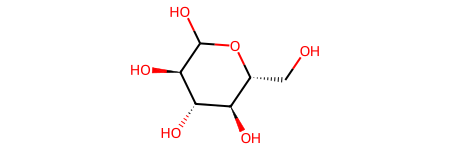

In [219]:
m

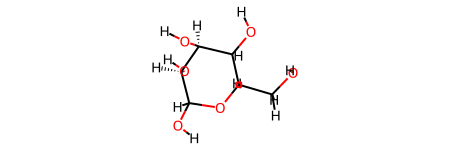

In [220]:
m2

In [221]:
res = AllChem.MMFFOptimizeMoleculeConfs(m2)
res

[(0, 93.51464725197313)]

In [235]:
# Running their code on ATP

ATP = Chem.MolFromSmiles('C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H](O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N')
ATP.SetProp("_Name", "mol-2d")
AllChem.Compute2DCoords(ATP)

0

In [236]:
print(Chem.MolToMolBlock(ATP))

mol-2d
     RDKit          2D

 31 33  0  0  0  0  0  0  0  0999 V2000
   -4.8482   -2.9599    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.3380   -2.7852    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -6.9315   -1.4076    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0353   -0.2048    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5456   -0.3795    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9520   -1.7571    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9190    0.9833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -5.0216    2.0004    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.3295    1.2661    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4481    1.2775    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8216    2.6404    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3318    2.4657    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0376    0.9948    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3456    0.260

In [244]:
ATP3D = Chem.AddHs(m)
ATP3D.SetProp("_Name","mol-3d")
AllChem.EmbedMolecule(ATP3D)

0

In [245]:
print(Chem.MolToMolBlock(ATP3D))

mol-3d
     RDKit          3D

 47 49  0  0  0  0  0  0  0  0999 V2000
    6.2840   -1.1498   -0.1765 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0425   -0.1524    0.2647 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.5417    1.0852    0.4740 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1959    1.3407    0.2199 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4299    0.2984   -0.2380 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9986   -0.8936   -0.4146 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.2152    0.8074   -0.4021 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.1964    2.1180   -0.0691 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4614    2.4505    0.3248 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.0618    0.0193   -0.8109 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.1586   -1.3962   -0.2897 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.8691   -1.5990    0.5423 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0847   -0.4444    0.0487 C   0  0  2  0  0  0  0  0  0  0  0  0
    0.9719    0.599

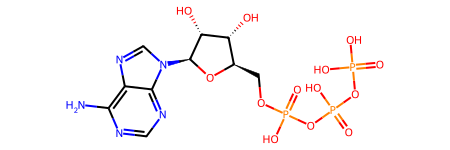

In [239]:
ATP

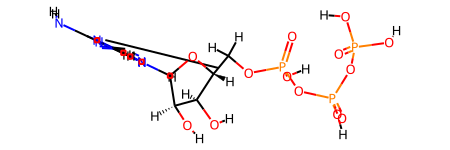

In [243]:
ATP3D

In [246]:
res = AllChem.MMFFOptimizeMoleculeConfs(ATP3D)
res

[(1, -483.07753890026646)]

### Results for Glucose and ATP

Glucose converged, but gave a very positive free energy value. ATP converged some of the time and gave very negative free energy values.

